<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-01-28-Naive_Bayes/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://onedrive.live.com/view.aspx?resid=B7999797B4FEAE64%211188&id=documents&wd=target%28Naive%20Bayes.one%7C3ED4348D-2E0B-6242-8272-45549E50FACD%2FIntro%7CBAA037BA-472C-BC45-A9BD-5E3B0F3BF9C6%2F%29
)

In [131]:
from plotly import data
import pandas as pd
import numpy as np

In [132]:
iris = data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [133]:
X = iris.drop(['species',	'species_id'], axis = 1)
Y = iris['species']

In [134]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)

# Scratch

In [135]:
import pandas as pd
import numpy as np

In [136]:
class NaiveBayes():
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        self.predictsample = Y.iloc[0]
        self.weights = {}
        self.classes = Y.unique()

        self.yprob = {}

        for lab, count in Y.value_counts().iteritems():
            self.yprob[lab] = count / Y.size
        
        for col in X.columns:
            cats = X[col].unique()

            self.weights[col] = pd.DataFrame(np.zeros((cats.size, self.classes.size)), columns = self.classes, index = cats)
            weight = self.weights[col]

            for lab in self.classes:
                x = X[ Y == lab ]
                y = Y[ Y == lab ]
                for cat, count in x[col].value_counts().iteritems():
                    weight[lab][cat] = count / y.size
    
    def predict(self, X):
        labels = np.full(X.shape[0], self.predictsample)
        for i,(_, x) in enumerate(X.iterrows()):
            maxp = 0
            label = ''
            for lab in self.classes:
                prob = self.yprob[lab]
                for col in x.index:
                    prob = prob*(self.weights[col][lab][x[col]])
                if prob > maxp:
                    maxp = prob
                    label = lab
            labels[i] = label
        return labels

In [137]:
model = NaiveBayes()
model.fit(X, Y)
# model.predict(X)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X), Y)

0.3333333333333333

In [139]:
from sklearn.naive_bayes import MultinomialNB

modelsk = MultinomialNB()
modelsk.fit(X, Y)
accuracy_score(modelsk.predict(X), Y)

0.9533333333333334

In [140]:
from sklearn.naive_bayes import GaussianNB

modelsk = GaussianNB()
modelsk.fit(X, Y)
accuracy_score(modelsk.predict(X), Y)

0.96

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


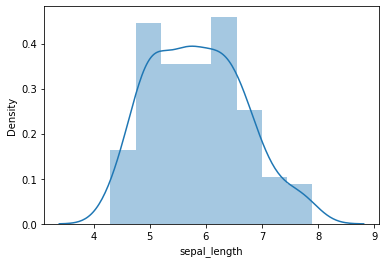

In [145]:
import seaborn as sns

sns.distplot(X['sepal_length'])

# Project

In [64]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
data = df = pd.read_csv("https://raw.githubusercontent.com/DependerKumarSoni/Naive-Bayes/main/adult.csv")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [85]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.sample(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19953,30,Private,224462,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
11840,49,Private,122385,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


**Objective**
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.


**1. Categorical Attributes**

*   **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category
*   **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree
*   **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status
*   **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation
*   **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family
*   **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual
*   **sex**: Female, Male.
*   **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country


**2. Continuous Attributes**

*   **age**: continuous.
Age of an individual
*   **fnlwgt**: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
*   **capital-gain**: continuous.
*   **capital-loss**: continuous.
*   **hours-per-week**: continuous.
Individual's working hour per week

In [67]:
data.shape

(32561, 15)

In [68]:
data_num = df.copy()

## Data Cleaning

In [69]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == ' ?'] = most_freq_attrib

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
data['occupation'].replace({' ?': np.nan}, inplace = True)
data['native_country'].replace({' ?': np.nan}, inplace = True)

In [71]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'most_frequent')
data[['occupation', 'native_country']] = si.fit_transform(data[['occupation', 'native_country']])

In [72]:
data['income'] = np.where(data['income'] == ' <=50K', 0, 1)

## Describe

In [21]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Summary



*   Age is more dispersed  after 48 age



In [22]:
data.describe(include=["O"])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753




*   `Native-country` has maximum number of unique categories i.e. 41 categories and is biased towards US.
*   `Occupation` has more or less uniform distribution of categories as comparerd to the other attributes.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


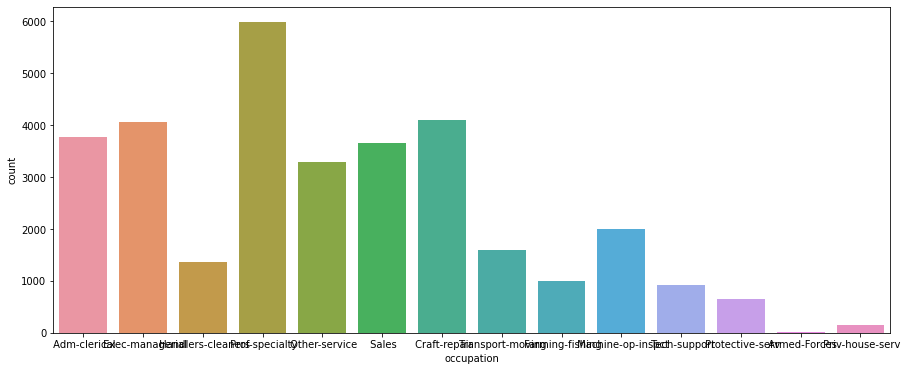

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


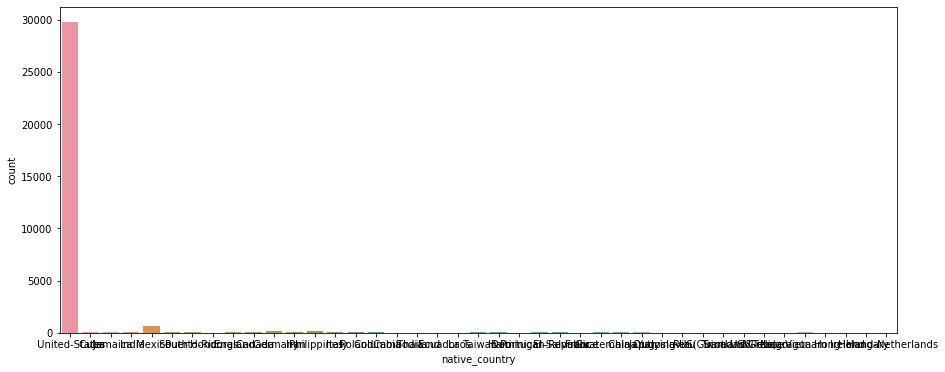

In [23]:
plt.figure(figsize = (15, 6))

sns.countplot(data['occupation'])
plt.show()

plt.figure(figsize = (15, 6))
sns.countplot(data['native_country'])
plt.show()

## EDA

### Univariate analysis

**age**

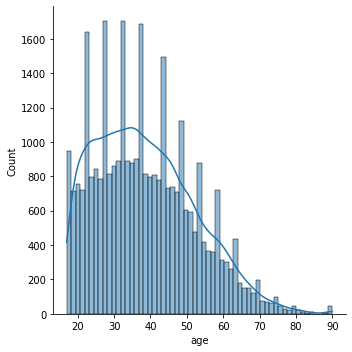

In [24]:
sns.displot(data['age'], kde = True)

In [25]:
print('after 60', (data['age']>60).sum())
print('after 70', (data['age']>70).sum())

after 60 2332
after 70 540




*   age attribute is not symmetric.
*   It is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
*   Minimum and Maximum age of the people is 17 and 90 respectively.
*   This dataset has fewer observations(540) of people's age after certain age i.e. 70 years.



**hours_per_week**

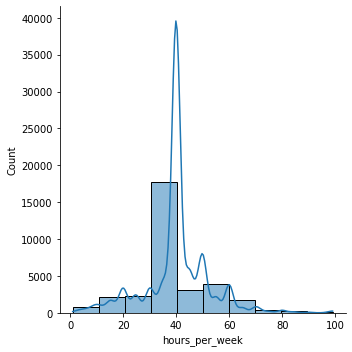

In [26]:
sns.displot(data['hours_per_week'], bins = 10, kde = True)

*    Most people work 30-40 hours per week, they are roughly 27,000 people.
*    There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

**fnlwgt**

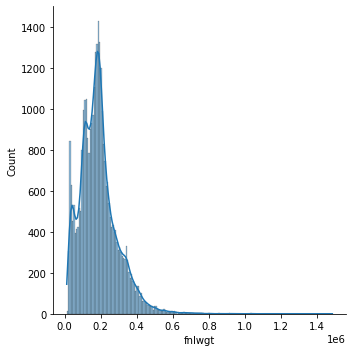

In [27]:
sns.displot(data['fnlwgt'], kde = True)

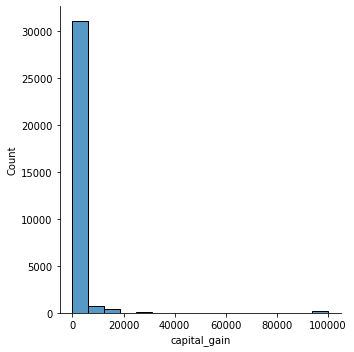

In [28]:
sns.displot(data['capital_gain'])

*   capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).

**capital-loss**

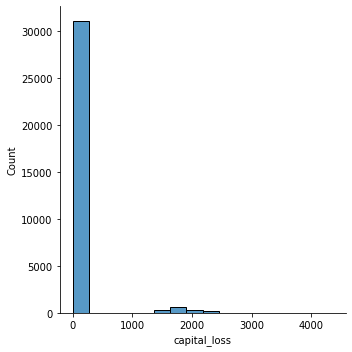

In [29]:
sns.displot(data['capital_loss'])



*   This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)



Relation between capital gain and capital loss

Let's explore more about capital loss and capital gain

Text(0.5, 0, 'capital_loss')

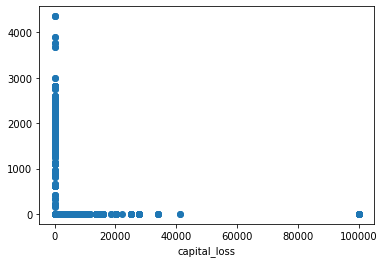

In [30]:
plt.scatter(data['capital_gain'],data['capital_loss'])
plt.xlabel('capital_gain')
plt.xlabel('capital_loss')



*   Both capital gain and capital loss can be zero
*   If capital.gain is zero there is possibility of capital loss being high or above zero.
*    If capital loss is zero there is possibility of capital.gain being high or above zero.



**Workclass**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


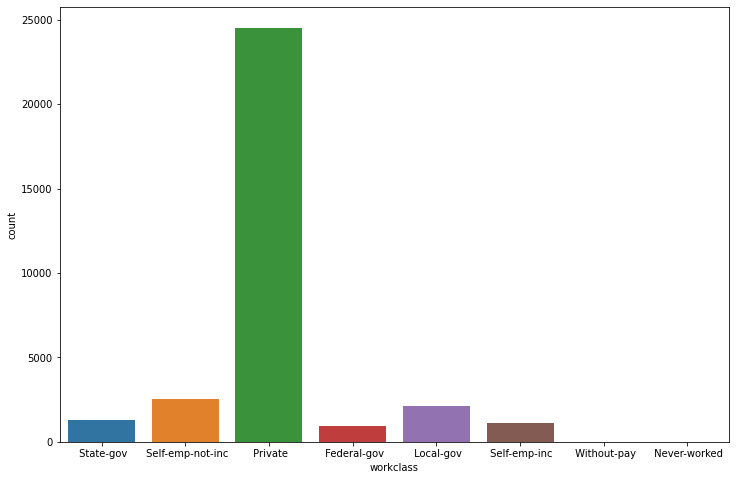

In [31]:
plt.figure(figsize=(12,8))

sns.countplot(data['workclass'])

imbalance dataset

**Education**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


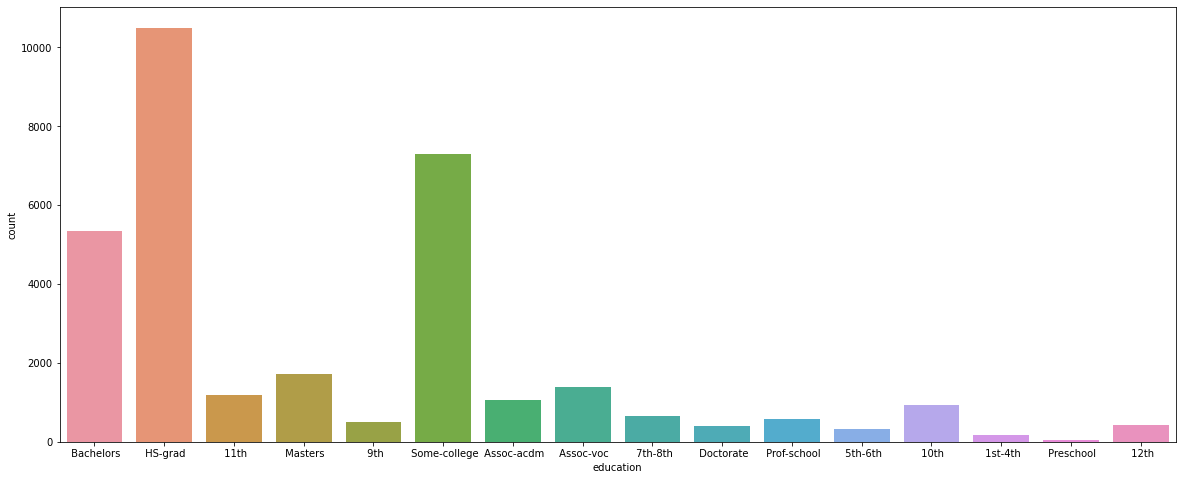

In [32]:
plt.figure(figsize=(20,8))
sns.countplot(data['education'])

**marital-status**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


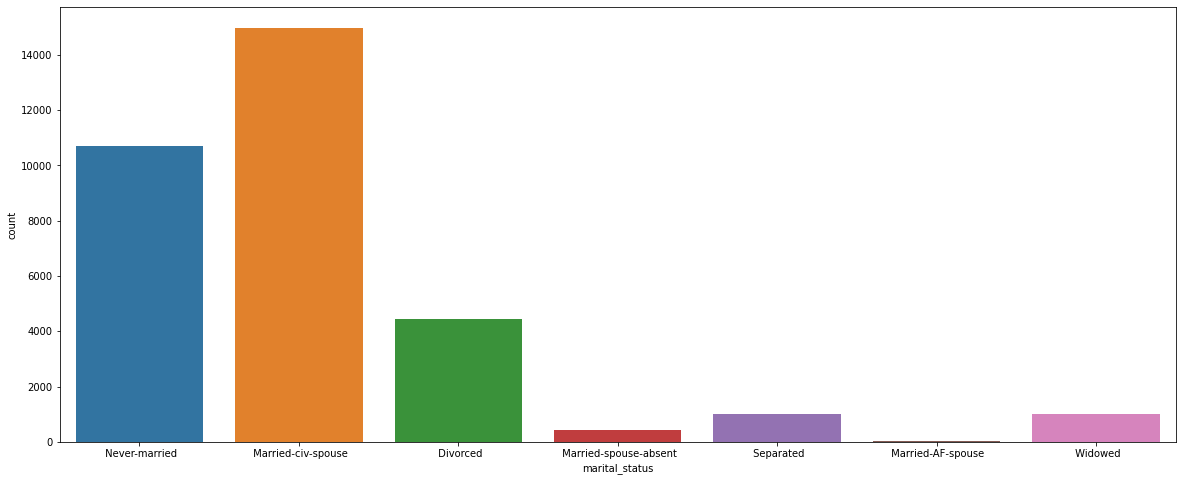

In [33]:
plt.figure(figsize = (20, 8))

sns.countplot(data['marital_status'])

### Bivariate analysis

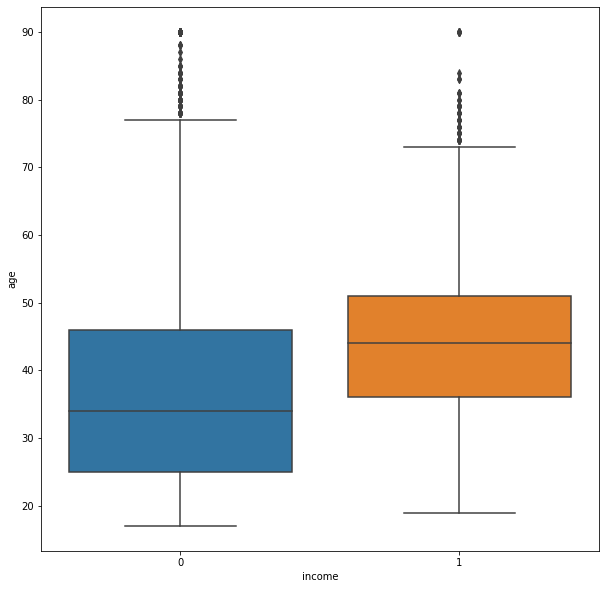

In [34]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [35]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.249841
0,0,36.783738


The mean "age" for Income group(<=50k) is 36.7 years.

And for Income group(>50k) is 44.2 years

###  Hours per week

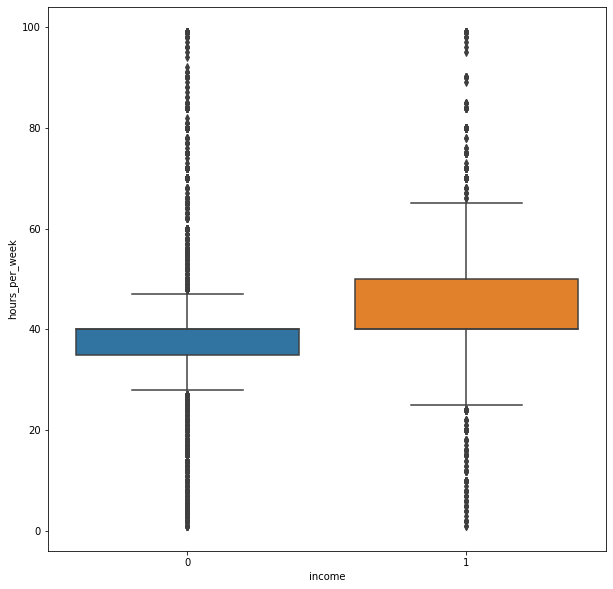

In [36]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours_per_week", data=data)
plt.show()

## Feature Engineering

In [88]:
num_col = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

In [90]:
y = data['income']

In [92]:
num_data = data[num_col]
cat_data = data.drop(num_col, axis = 1)

## Select and Train

### Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


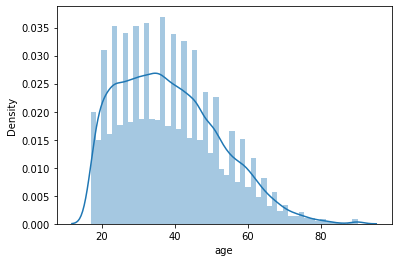

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


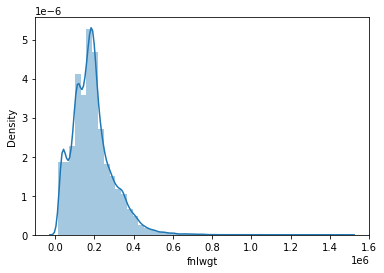

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


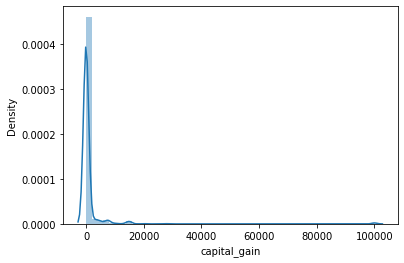

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


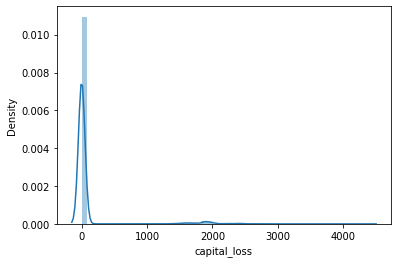

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


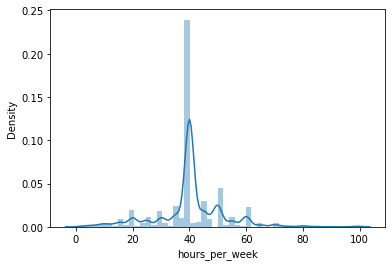

In [150]:
for col in num_col:
    sns.distplot(num_data[col])
    plt.show()

In [146]:
X = num_data
# X['capital_change'] = data['capital_gain']-data['capital_loss']

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

X = RobustScaler().fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=20)

In [148]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb.score(xtest, ytest)

0.7911547911547911

### Categorical 

In [121]:
X = cat_data

In [127]:
from sklearn.preprocessing import OrdinalEncoder

od = OrdinalEncoder()
X[X.columns] = od.fit_transform(X)
X

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,income
0,6.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,39.0,0.0
1,4.0,11.0,8.0,0.0,6.0,1.0,4.0,1.0,39.0,0.0
2,4.0,1.0,6.0,2.0,6.0,0.0,2.0,1.0,39.0,0.0
3,4.0,9.0,12.0,2.0,10.0,5.0,2.0,0.0,5.0,0.0
4,4.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...
32555,4.0,7.0,11.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32556,4.0,11.0,8.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32557,4.0,11.0,8.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0
32558,4.0,11.0,8.0,4.0,1.0,3.0,4.0,1.0,39.0,0.0


In [128]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=20)

In [130]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(xtrain, ytrain)
print('Test', mnb.score(xtest, ytest))
print('Train', mnb.score(xtrain, ytrain))

Test 0.9889434889434889
Train 0.9903767403767404
